### Exploratory Data Analysis

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import warnings

### Problem definition
Identify existing customers who are more likely to take out a long-term deposit.

### Import data and create DataFrame

In [4]:
df = pd.read_csv("/workspaces/josefina-aispuro-merelles-machine-learning/data/raw/bank-marketing-campaign-data.csv", sep = ";")
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


### Descriptive analysis

In [5]:
# Check the dimensions
df.shape

(41188, 21)

In [6]:
# Data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [7]:
# Generate a statistical summary of numerical columns and transpose it for readability
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


### Observations
- There are 41188 rows and 21 columns.
- There are no null values in any of the columns/rows.
- The data contains 10 numerical features and 11 categorical features.

### Data Cleaning

In [8]:
# Looking for duplicated data
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
41183    False
41184    False
41185    False
41186    False
41187    False
Length: 41188, dtype: bool

In [9]:
# Dropping duplicates if True
if df.duplicated().sum():
        df = df.drop_duplicates()
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


### Observations
We have removed the 12 duplicated rows.

In [10]:
# Checking some columns
df["default"].value_counts()

default
no         32577
unknown     8596
yes            3
Name: count, dtype: int64

In [11]:
# Dropping irrelevant information
df.drop(["default"], axis = 1, inplace = True)
df

/tmp/ipykernel_1138/2069658227.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(["default"], axis = 1, inplace = True)


,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


### Observations
The default column has too many missing or unknown values (around 20% of the dataset), so it was removed as it provides little meaningful information for the analysis.

### Visualization

In [12]:
# Factorize for categorical features
df_factorized = df.copy()
df_factorized["job_n"] = pd.factorize(df_factorized["job"])[0]
df_factorized["marital_n"] = pd.factorize(df_factorized["marital"])[0]
df_factorized["education_n"] = pd.factorize(df_factorized["education"])[0]
df_factorized["housing_n"] = pd.factorize(df_factorized["housing"])[0]
df_factorized["loan_n"] = pd.factorize(df_factorized["loan"])[0]
df_factorized["contact_n"] = pd.factorize(df_factorized["contact"])[0]
df_factorized["month_n"] = pd.factorize(df_factorized["month"])[0]
df_factorized["day_of_week_n"] = pd.factorize(df_factorized["day_of_week"])[0]
df_factorized["poutcome_n"] = pd.factorize(df_factorized["poutcome"])[0]
df_factorized["y_n"] = pd.factorize(df_factorized["y"])[0]
df_factorized.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,...,job_n,marital_n,education_n,housing_n,loan_n,contact_n,month_n,day_of_week_n,poutcome_n,y_n
0,56,housemaid,married,basic.4y,no,no,telephone,may,mon,261,...,0,0,0,0,0,0,0,0,0,0
1,57,services,married,high.school,no,no,telephone,may,mon,149,...,1,0,1,0,0,0,0,0,0,0
2,37,services,married,high.school,yes,no,telephone,may,mon,226,...,1,0,1,1,0,0,0,0,0,0
3,40,admin.,married,basic.6y,no,no,telephone,may,mon,151,...,2,0,2,0,0,0,0,0,0,0
4,56,services,married,high.school,no,yes,telephone,may,mon,307,...,1,0,1,0,1,0,0,0,0,0


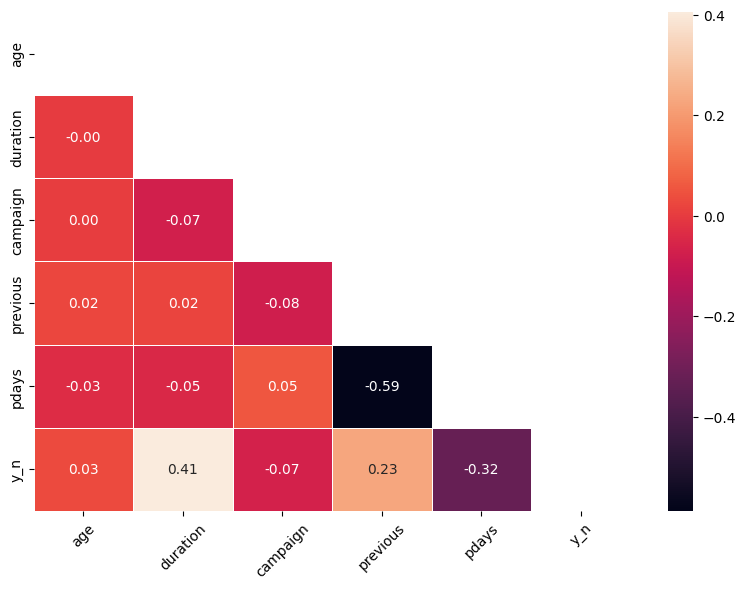

In [13]:
# Client-related numerical features
client_numerical_columns = ["age", "duration", "campaign", "previous", "pdays", "y_n"]
corr_client_numerical = df_factorized[client_numerical_columns].corr()
mask_client_numerical = np.triu(np.ones_like(corr_client_numerical, dtype = bool))

fig, axis = plt.subplots(figsize=(8, 6))
sns.heatmap(corr_client_numerical, mask = mask_client_numerical, annot = True, linewidths = 0.5, fmt = ".2f")
plt.xticks(rotation = 45)

plt.tight_layout()
plt.show()

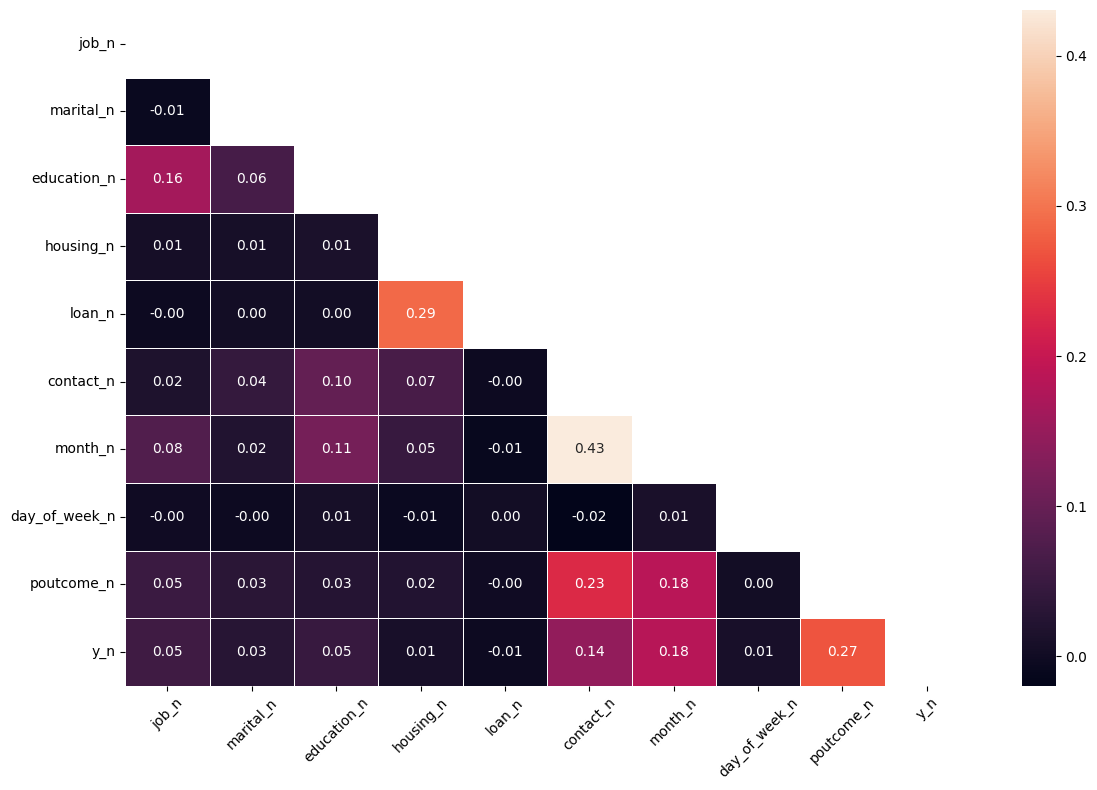

In [14]:
# Client-related categorical features
client_categorical_columns = ["job_n", "marital_n", "education_n", "housing_n", "loan_n", "contact_n", "month_n", "day_of_week_n", "poutcome_n", "y_n"]
corr_client_categorical = df_factorized[client_categorical_columns].corr()
mask_client_categorical = np.triu(np.ones_like(corr_client_categorical, dtype = bool))

fig, axis = plt.subplots(figsize=(12, 8))
sns.heatmap(corr_client_categorical, mask = mask_client_categorical, annot = True, linewidths = 0.5, fmt = ".2f")
plt.xticks(rotation = 45)

plt.tight_layout()
plt.show()

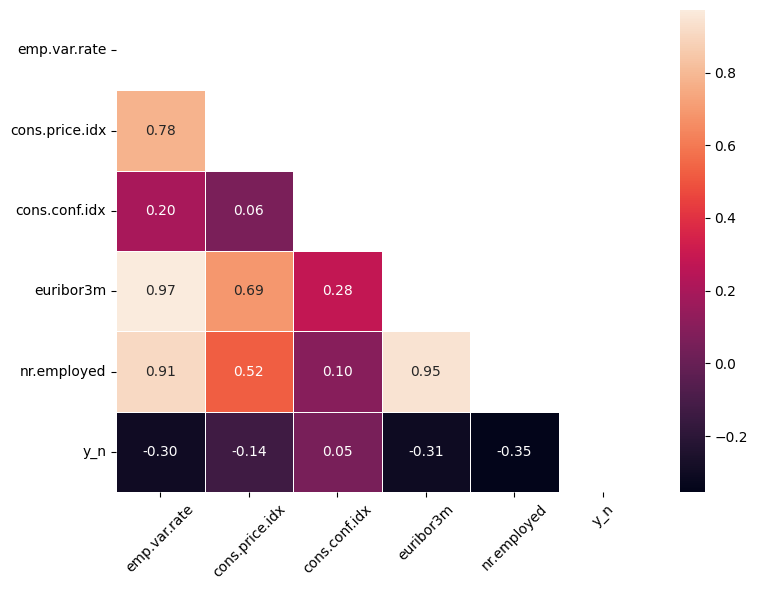

In [15]:
# Bank-related categorical features
bank_columns = ["emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed", "y_n"]
corr_bank = df_factorized[bank_columns].corr()
mask_bank = np.triu(np.ones_like(corr_bank, dtype = bool))

fig, axis = plt.subplots(figsize=(8, 6))
sns.heatmap(corr_bank, mask = mask_bank, annot = True, linewidths = 0.5, fmt = ".2f")
plt.xticks(rotation = 45)

plt.tight_layout()
plt.show()

In [16]:
# Dropping irrelevant columns from our original dataframe
df.drop(["pdays", "contact", "euribor3m", "nr.employed", "cons.price.idx"], axis = 1, inplace = True)
df

/tmp/ipykernel_1138/2763663094.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(["pdays", "contact", "euribor3m", "nr.employed", "cons.price.idx"], axis = 1, inplace = True)


,age,job,marital,education,housing,loan,month,day_of_week,duration,campaign,previous,poutcome,emp.var.rate,cons.conf.idx,y
0,56,housemaid,married,basic.4y,no,no,may,mon,261,1,0,nonexistent,1.1,-36.4,no
1,57,services,married,high.school,no,no,may,mon,149,1,0,nonexistent,1.1,-36.4,no
2,37,services,married,high.school,yes,no,may,mon,226,1,0,nonexistent,1.1,-36.4,no
3,40,admin.,married,basic.6y,no,no,may,mon,151,1,0,nonexistent,1.1,-36.4,no
4,56,services,married,high.school,no,yes,may,mon,307,1,0,nonexistent,1.1,-36.4,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,yes,no,nov,fri,334,1,0,nonexistent,-1.1,-50.8,yes
41184,46,blue-collar,married,professional.course,no,no,nov,fri,383,1,0,nonexistent,-1.1,-50.8,no
41185,56,retired,married,university.degree,yes,no,nov,fri,189,2,0,nonexistent,-1.1,-50.8,no
41186,44,technician,married,professional.course,no,no,nov,fri,442,1,0,nonexistent,-1.1,-50.8,yes


### Observations
- In the first heatmap, the strongest correlation observed is between the columns pdays (number of days that passed since the last campaign until the client was contacted) and previous (number of contacts performed during the previous campaign to the client), with a value of -0.59. Since both variables describe similar information about the client’s contact history, we decided to remove the pdays column and keep previous for our analysis.
- In the second heatmap, all correlations between variables, including the target, are very close to 0. The most distant one is 0.43, between month_n (the last month in which the client was contacted) and contact_n (the type of communication used for contact). Since contact_n only contains two similar categories ("cellular" and "telephone") and provides little predictive value, we decided to remove the contact_n column and keep month_n, which could still capture seasonal effects in client behavior.
- In the third heatmap, we can observe higher correlations between variables. The column emp.var.rate (employment variation rate – quarterly indicator) has a correlation of 0.78 with cons.price.idx (consumer price index – monthly indicator), 0.97 with euribor3m (EURIBOR 3-month rate – daily indicator), and 0.91 with nr.employed (number of employees – quarterly indicator). The column cons.conf.idx (consumer confidence index) also shows a correlation of 0.69 with euribor3m, and euribor3m has a correlation of 0.95 with nr.employed. Since these variables are highly correlated and represent similar macroeconomic information, we decided to keep only emp.var.rate and  cons.conf.idx, and remove euribor3m, nr.employed, and cons.price.idx to avoid redundancy and multicollinearity in the model.

### Train / Test Split

In [ ]:
# Define X (features) and y (target)
X = df.drop(columns = ["y"])
y = df["y"]

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### Label Encoding

In [18]:
# Create copies of the training and test sets
X_train_cat_le = X_train.copy()
X_test_cat_le = X_test.copy()

categorical_columns = ["job", "marital", "education", "housing", "loan", "month", "day_of_week", "poutcome"]

# Encode categorical columns
for column in categorical_columns:
    label_encoder = LabelEncoder()
    label_encoder.fit(X_train[column])
    X_train_cat_le[column + "_le"] = label_encoder.transform(X_train[column])
    X_test_cat_le[column + "_le"] = label_encoder.transform(X_test[column])

# Encode target "y"
label_encoder_y = LabelEncoder()
label_encoder_y.fit(y_train)
y_train_le = label_encoder_y.transform(y_train)
y_test_le = label_encoder_y.transform(y_test)

X_train_cat_le.head()

,age,job,marital,education,housing,loan,month,day_of_week,duration,campaign,...,emp.var.rate,cons.conf.idx,job_le,marital_le,education_le,housing_le,loan_le,month_le,day_of_week_le,poutcome_le
12348,29,entrepreneur,married,basic.6y,yes,yes,jul,fri,286,3,...,1.4,-42.7,2,1,1,2,2,3,0,1
8565,50,admin.,single,university.degree,no,no,jun,wed,178,6,...,1.4,-41.8,0,2,6,0,0,4,4,1
21424,29,admin.,single,university.degree,no,no,aug,tue,103,4,...,1.4,-36.1,0,2,6,0,0,1,3,1
3316,35,admin.,single,university.degree,no,no,may,thu,135,1,...,1.1,-36.4,0,2,6,0,0,6,2,1
33246,40,blue-collar,single,high.school,no,no,may,tue,418,1,...,-1.8,-46.2,1,2,3,0,0,6,3,1


### Feature Scaling

In [19]:
# Select only numeric columns + encoded columns
columns_to_scale = ["age", "duration", "campaign", "previous", "emp.var.rate", "cons.conf.idx"] + [column for column in X_train_cat_le.columns if column.endswith("_le")]

# Standard Scaler
scaler = StandardScaler()
scaler.fit(X_train_cat_le[columns_to_scale])
X_train_scaled = scaler.transform(X_train_cat_le[columns_to_scale])
X_test_scaled  = scaler.transform(X_test_cat_le[columns_to_scale])

# Convert to DataFrame
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns = columns_to_scale)
X_test_scaled_df  = pd.DataFrame(X_test_scaled, columns = columns_to_scale)

X_train_scaled_df.head()

,age,duration,campaign,previous,emp.var.rate,cons.conf.idx,job_le,marital_le,education_le,housing_le,loan_le,month_le,day_of_week_le,poutcome_le
0,-1.058427,0.112453,0.152155,-0.348601,0.838815,-0.470932,-0.478726,-0.282604,-1.282656,0.938462,2.300538,-0.533242,-1.437879,0.190933
1,0.954767,-0.305973,1.229538,-0.348601,0.838815,-0.276368,-1.035363,1.357166,1.056055,-1.091877,-0.454437,-0.101988,1.424022,0.190933
2,-1.058427,-0.596546,0.511282,-0.348601,0.838815,0.955866,-1.035363,1.357166,1.056055,-1.091877,-0.454437,-1.395750,0.708546,0.190933
3,-0.483229,-0.472568,-0.566100,-0.348601,0.647683,0.891011,-1.035363,1.357166,1.056055,-1.091877,-0.454437,0.760521,-0.006929,0.190933
4,-0.003897,0.623862,-0.566100,-0.348601,-1.199927,-1.227566,-0.757044,1.357166,-0.347172,-1.091877,-0.454437,0.760521,0.708546,0.190933


### Logistic Regression

In [20]:
# Create the model
model = LogisticRegression(random_state = 18)

# Train the model
model.fit(X_train_scaled_df, y_train_le)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,18
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [21]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled_df)
y_pred

array([1, 0, 0, ..., 0, 0, 0], shape=(8236,))

In [22]:
# Evaluate accuracy
model_accuracy = accuracy_score(y_test_le, y_pred)
model_accuracy

0.9009227780475959

### Observations
The logistic regression model achieved 90% accuracy on the test set, showing strong baseline performance.

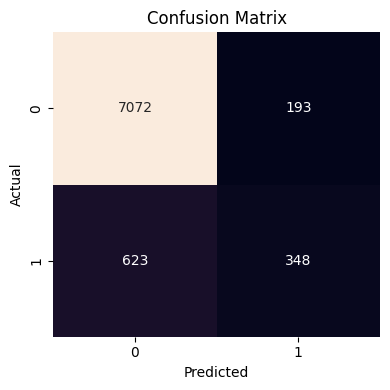

In [23]:
# Confusion Matrix
cm = confusion_matrix(y_test_le, y_pred)
df_cm = pd.DataFrame(cm)

# Chart
plt.figure(figsize = (4, 4))
sns.heatmap(df_cm, annot = True, fmt = "d", cbar = False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

plt.tight_layout()
plt.show()

### Observations

#### Cell interpretation
- True Negative (TN) = 7072 → Correctly predicted “no”
- False Positive (FP) = 193 → Predicted “yes” but actually “no”
- False Negative (FN) = 623 → Predicted “no” but actually “yes”
- True Positive (TP) = 348 → Correctly predicted “yes”

#### Results
- The model predicts “no” very well (high TN).
- The model struggles with “yes” (FN > TP).
- The dataset is imbalanced (more “no” than “yes”).
- The high accuracy (0.90) is largely due to the model correctly predicting the majority class ("no"), and does not fully reflect its performance on the minority class ("yes").

### Optimization

In [30]:
# Define hyperparams manually
hyperparams = {"C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
               "penalty": ["l1", "l2", "elasticnet", None],
               "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]}


# Initialize the grid search
grid = GridSearchCV(model, hyperparams, scoring = "accuracy", cv = 5)

grid

,estimator,LogisticRegre...ndom_state=18)
,param_grid,"{'C': [0.001, 0.01, ...], 'penalty': ['l1', 'l2', ...], 'solver': ['newton-cg', 'lbfgs', ...]}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l2'


In [25]:
# Looking for best parameters
grid.fit(X_train_scaled_df, y_train_le)

grid.best_params_

/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1232: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1232: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1232: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1232: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1232: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1232: U

/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1232: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1232: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1232: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1232: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1232: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1232: U

{'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}

In [26]:
grid.best_estimator_

,penalty,'l2'
,dual,False
,tol,0.0001
,C,0.01
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,18
,solver,'liblinear'
,max_iter,100
,multi_class,'deprecated'


In [27]:
# Save the best model found by GridSearchCV
best_model_grid = grid.best_estimator_

# Make predictions on the training set using the optimized model
y_pred_grid = best_model_grid.predict(X_test_scaled_df)

# Calculate the accuracy of the optimized model on the training data
grid_accuracy = accuracy_score(y_test_le, y_pred_grid)

In [28]:
# Compare the baseline model accuracy with the optimized model accuracy
model_accuracy, grid_accuracy

(0.9009227780475959, 0.9004371053909664)

### Observations
The optimized logistic regression model slightly improved accuracy, increasing from 90.09% to 90.66%, showing a small but positive effect of hyperparameter tuning.